# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv
df= pd.read_csv("laptops_data .csv")

# Show DataFrame

In [2]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,Sales
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,48340
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,26185
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others,29317
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,46753
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,48274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows,20137
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,32909
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,59307
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,22965


# 1: Data Set Description

In [3]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Sales
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946,30490.946583
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571,9549.655134
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000,18021.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000,25908.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000,29197.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000,32787.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000,76507.000000


# 2: Most Commmon Companies

In [4]:
company_counter=Counter()

with open("laptops_data .csv") as csv_file:
    csv_reader=csv.DictReader(csv_file)

    for row in csv_reader:
        company_counter.update(row["ï»؟Company"].split(","))

company_counter.most_common()

[('Dell', 291),
 ('Lenovo', 289),
 ('HP', 268),
 ('Asus', 151),
 ('Acer', 101),
 ('MSI', 54),
 ('Toshiba', 48),
 ('Apple', 21),
 ('Samsung', 8),
 ('Razer', 7),
 ('Mediacom', 7),
 ('Microsoft', 6),
 ('Xiaomi', 4),
 ('Vero', 4),
 ('Chuwi', 3),
 ('Google', 3),
 ('Fujitsu', 3),
 ('LG', 3),
 ('Huawei', 2)]

# 3: Average Sales by Company:
Calculate average sales for each company (e.g., Apple, HP) to identify the highest-performing brand.

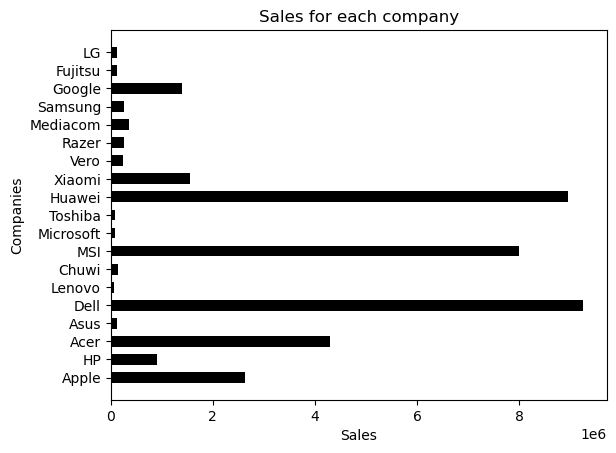

In [5]:
companies=df["Company"].unique()

sales=df.groupby("Company")["Sales"].sum().reset_index()
sales=sales["Sales"]

company_sale_dict={k:v for (k,v) in zip(companies,sales)}
 
plt.barh(companies, sales, color = "k", height = 0.6)
plt.title("Sales for each company")
plt.xlabel("Sales")
plt.ylabel("Companies")


plt.show()

# 4: Touchscreen Adoption:
Analyze the percentage of laptops with touchscreen functionality to understand market preferences.

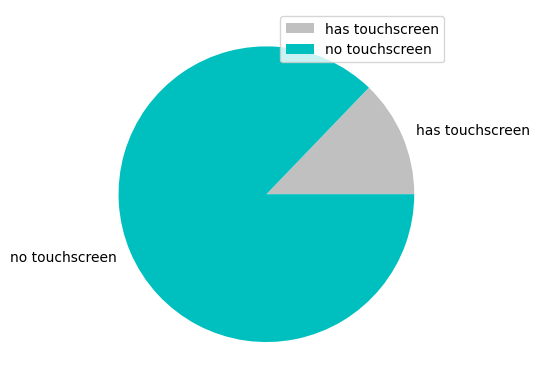

In [6]:
touchie=df["TouchScreen"].sum()
all_laptops=1273


toucies_per_company=df.groupby("Company")["TouchScreen"].sum().reset_index()
plt.pie([touchie, all_laptops], labels = ["has touchscreen", "no touchscreen"],  colors = ["silver", "c"] )

plt.legend()

plt.show()

# 5: Distribution of Laptop Types:
Analyze the distribution of laptop types (e.g., Ultrabook, Notebook) to understand prevalence.

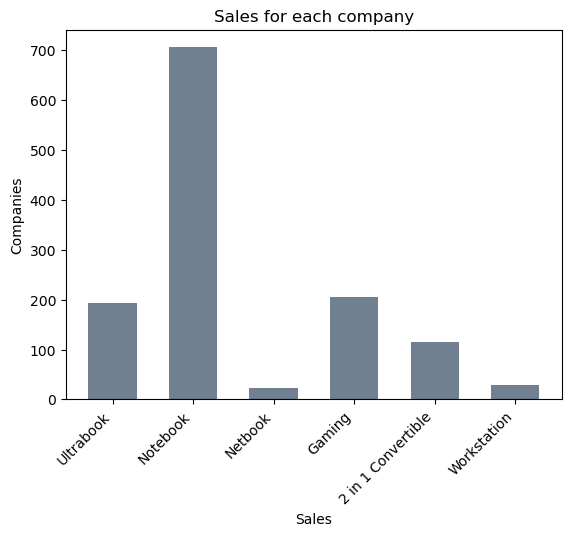

In [7]:
type_counter=Counter()
with open("laptops_data .csv") as csv_file_type:
    csv_reader_type=csv.DictReader(csv_file_type)

    for row in csv_reader_type:
        type_counter.update(row["TypeName"].split(","))


types, type_counts = zip(*type_counter.items())


plt.bar(types, type_counts, color = "slategray", width = 0.6)
plt.title("Sales for each company")
plt.xlabel("Sales")
plt.ylabel("Companies")
plt.xticks(rotation=45, ha="right")

plt.show()

# 6: Relation between IPS and PPI:
Explore the relationship between IPS and PPI to determine if there's a correlation.

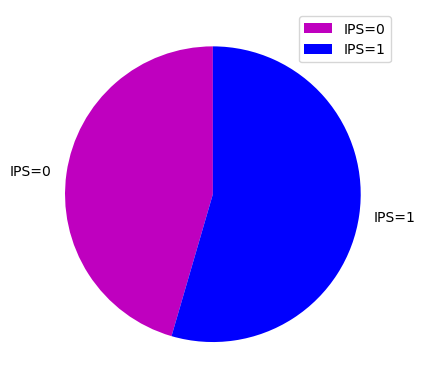

In [8]:
#average ppi when ips is =0:
ppi_given_ips_0= df[df['Ips'] == 0]['Ppi'].mean()
ppi_given_ips_1= df[df['Ips'] == 1]['Ppi'].mean()

plt.pie([ppi_given_ips_0, ppi_given_ips_1], labels = ["IPS=0", "IPS=1"], startangle= 90, colors = ["m", "b"] )

plt.legend()

plt.show()

# 7: GPU Brands Impact on Sales:
Investigate whether GPU brand has a significant impact on laptop sales.

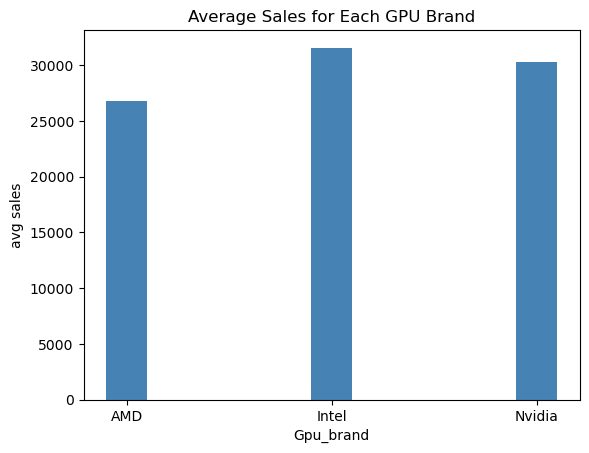

In [9]:
avg_gpu_sale_p_company=df.groupby("Gpu_brand")["Sales"].mean().reset_index()
gpu_unique=avg_gpu_sale_p_company["Gpu_brand"]
avg_sales=avg_gpu_sale_p_company["Sales"]

plt.bar(gpu_unique,avg_sales, color = "steelblue", width = 0.2)
plt.title("Average Sales for Each GPU Brand")
plt.xlabel("Gpu_brand")
plt.ylabel("avg sales")

plt.show()

# 8: Impact of RAM on Price:
Investigate the correlation between RAM and laptop prices to understand pricing strategies.

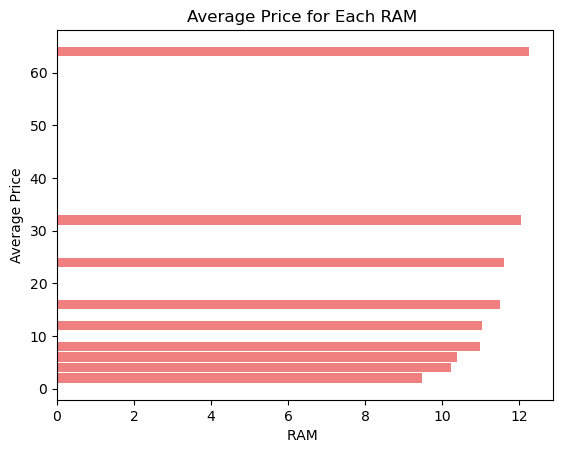

In [10]:
avg_ram = df.groupby("Ram")["Price"].mean().reset_index()

rams = avg_ram["Ram"]
average_Price = avg_ram["Price"]

plt.barh(rams, average_Price, color="lightcoral", height=1.8)
plt.title("Average Price for Each RAM ")
plt.xlabel("RAM ")
plt.ylabel("Average Price")

plt.show()

# 9: Popular CPU Brands:
Identify the most common CPU brands to assess popularity among consumers.

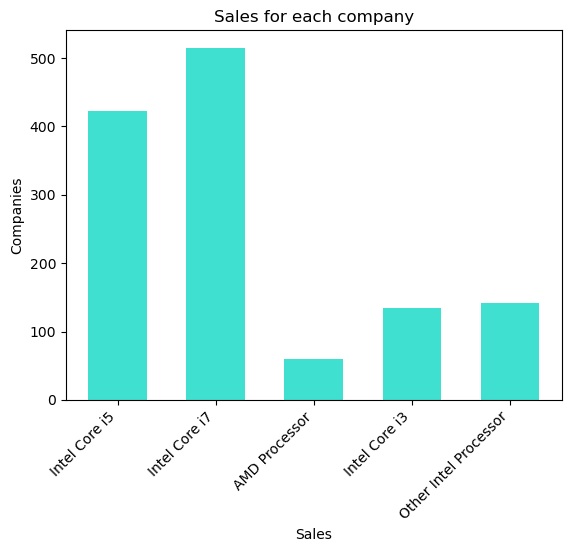

In [11]:
cpu_counter=Counter()
with open("laptops_data .csv") as csv_file_cpu:
    csv_reader_cpu=csv.DictReader(csv_file_cpu)

    for row in csv_reader_cpu:
        cpu_counter.update(row["Cpu_brand"].split(","))

cpu, cpu_counts = zip(*cpu_counter.items())

plt.bar(cpu, cpu_counts, color = "turquoise", width = 0.6)
plt.title("Sales for each company")
plt.xlabel("Sales")
plt.ylabel("Companies")
plt.xticks(rotation=45, ha="right")

plt.show()

# 10: Storage Preferences:
Analyze the distribution of HDD and SSD storage options to observe preferences.

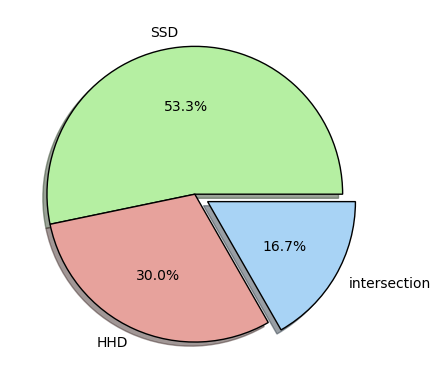

In [12]:
has_HDD = len(df[(df['HDD'] > 0) & (df['SSD'] == 0)])
has_SSD = len(df[(df['HDD'] == 0) & (df['SSD'] > 0)])
intersection = len(df[(df['HDD'] > 0) & (df['SSD'] > 0)])

plt.style.use="fivethirtyeight"
labels=["SSD","HHD","intersection"]
colors=['#b5efa2','#e7a29c','#a8d3f5' ]
explode=[0,0,0.1]
plt.pie([has_SSD,has_HDD,intersection],labels=labels,autopct='%1.1f%%',explode=explode,shadow=True,
        colors=colors,wedgeprops={'edgecolor':'k'})

plt.show()

# 11: Operating System Preferences:
Explore the popularity of different operating systems (Mac, Windows, Others) based on sales data.

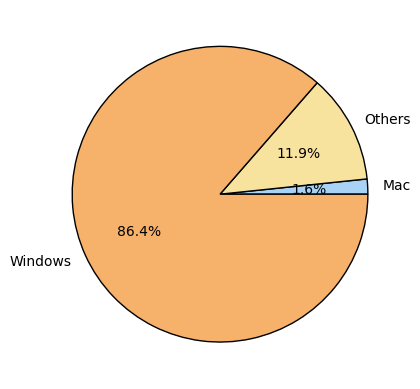

In [13]:
Mac = len(df[df["Os"] == "Mac"])
Windows = len(df[df["Os"] == "Windows"])
Others = len(df[df["Os"] == "Others"])
plt.style.use="Solarize_Light2"
labels=['Mac', 'Others', 'Windows']
colors=['#a8d3f5','#f7e29e','#f6b26b' ]
plt.pie([Mac, Others, Windows],labels=labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'k'},colors=colors)

plt.show()

# 12: Weight Distribution:
Examine the distribution of laptop weights to identify trends or patterns.

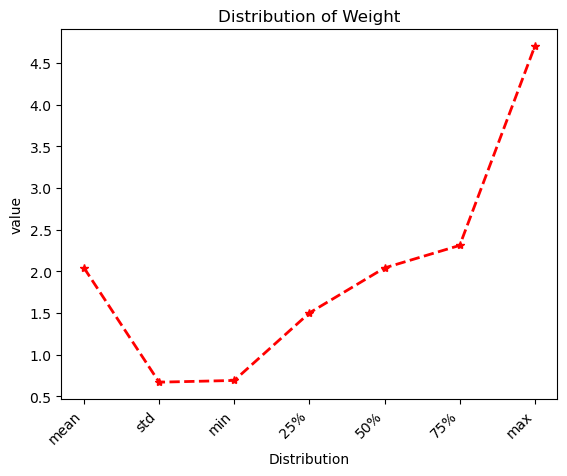

In [14]:
dist, w_value = zip(*df["Weight"].describe().iloc[1:].items())
plt.plot(dist, w_value,color='r',linestyle='--',marker="*",linewidth=2)
plt.xlabel("Distribution")
plt.ylabel("value")
plt.title("Distribution of Weight")
plt.xticks(rotation=45, ha="right")

plt.show()

# 13: companies that has gaming category 

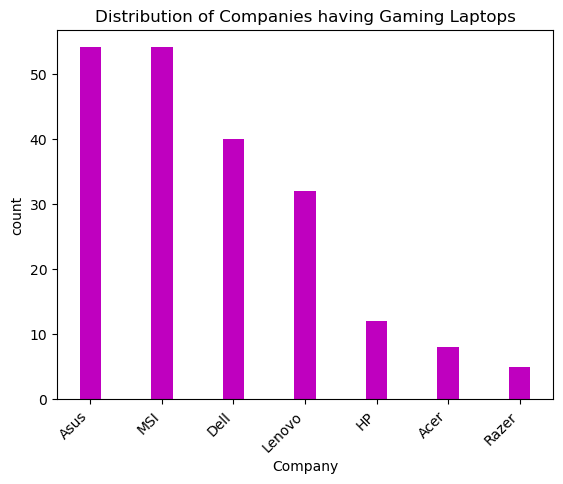

In [15]:
df_Gaming_count = pd.read_csv("laptops_data .csv")

gaming_laptops = df_Gaming_count[df_Gaming_count['TypeName'] == 'Gaming']

gaming_counts = gaming_laptops['Company'].value_counts()

G_company, G_count = zip(*gaming_counts.items())

plt.bar(G_company, G_count,width=0.3,color='m')
plt.xlabel("Company")
plt.ylabel("count")
plt.title("Distribution of Companies having Gaming Laptops")
plt.xticks(rotation=45, ha="right")

plt.show()

# 14: avg price for each company

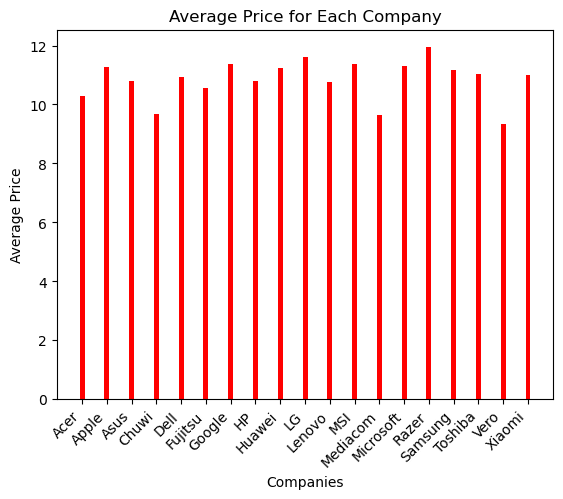

In [16]:
avg_price_company = df.groupby("Company")["Price"].mean().reset_index()

companies = avg_price_company["Company"]
average_prices = avg_price_company["Price"]
plt.bar(companies, average_prices, color="r",width=0.2)
plt.xticks(rotation=45, ha="right")
plt.title("Average Price for Each Company")
plt.xlabel("Companies")
plt.ylabel("Average Price")

plt.show()

# 15: price and sales relation 

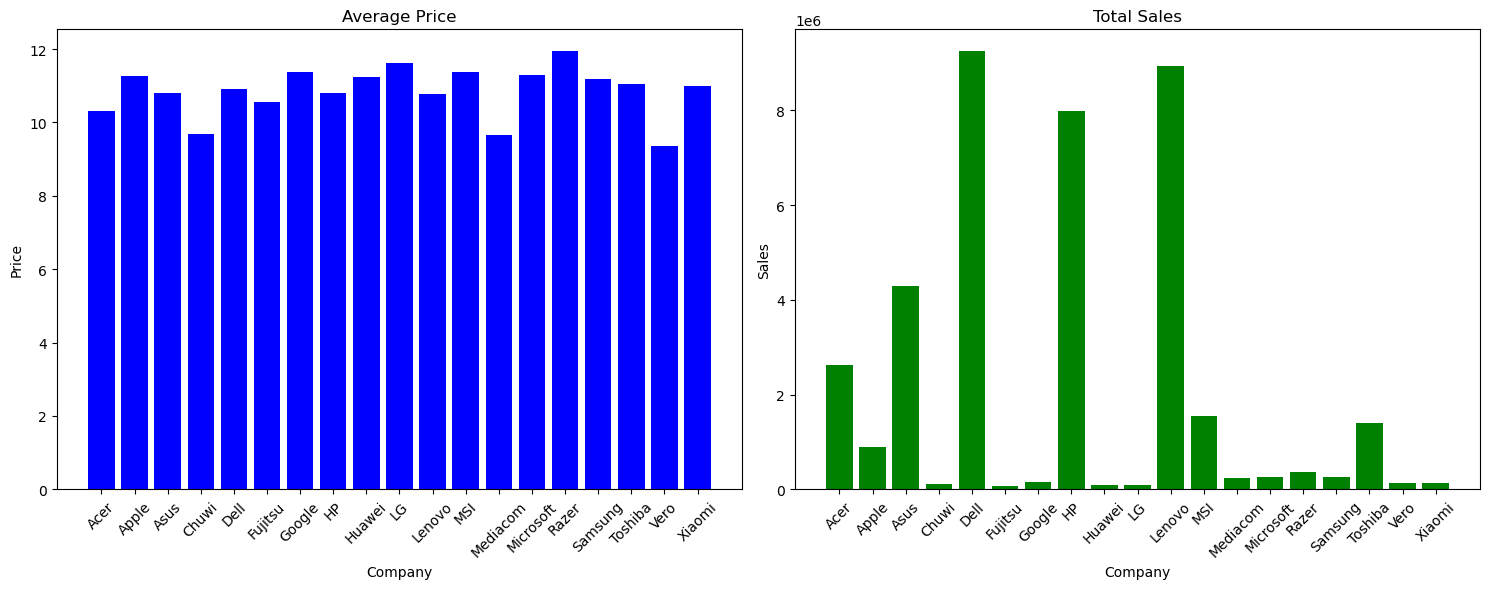

In [17]:
price_sales_rel = df.groupby('Company').agg({'Price': 'mean', 'Sales': 'sum'}).reset_index()

x = price_sales_rel['Company']
y_price = price_sales_rel['Price']
y_sales = price_sales_rel['Sales']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(x, y_price, color='blue')
ax1.set_title('Average Price')
ax1.set_xlabel('Company')
ax1.set_ylabel('Price')
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=45)

ax2.bar(x, y_sales, color='green')
ax2.set_title('Total Sales')
ax2.set_xlabel('Company')
ax2.set_ylabel('Sales')
ax2.set_xticks(x)
ax2.set_xticklabels(x, rotation=45)

plt.tight_layout()

plt.show()